In [1]:
import keras
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

Using TensorFlow backend.


# CIFAR-10 dataset
The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def one_hot(label):
    a = np.zeros(10)
    a[label] = 1
    return a

def load_CIFAR_batch(filename):
    datadict = unpickle(filename)
    X = datadict[b'data']
    X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype(np.float32)
    Y = datadict[b'labels']
    Y = [one_hot(lbl) for lbl in Y]
    Y = np.array(Y)
    return X, Y

def load_CIFAR10(ROOT):
    xs = []
    ys = []
    for b in range(1, 6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    # Xtr -= Xtr.mean(axis=0)
    # Xte -= Xte.mean(axis=0)
    return Xtr, Ytr, Xte, Yte

X, Y, X_te, Y_te = load_CIFAR10('cifar-10-batches-py')
print(X.shape, Y.shape)
print(X_te.shape, Y_te.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


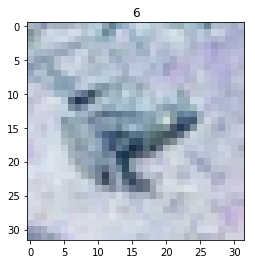

In [3]:
n = 22
plt.imshow(X[n])
plt.title(np.argmax(Y[n]))

# Define Keras Model

In [4]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation=None, input_shape=(32, 32, 3)))
model.add(BatchNormalization(scale=False))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same'))
model.add(BatchNormalization(scale=False))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, strides=1, padding='same'))
model.add(BatchNormalization(scale=False))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=3, strides=1, padding='same'))
model.add(BatchNormalization(scale=False))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

adam = Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        96        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        96        
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [9]:
history = model.fit(X, Y, batch_size=32, epochs=10, validation_split=0.02)

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 44s - loss: 1.7963 - acc: 0.3709 - val_loss: 1.4615 - val_acc: 0.5170
Epoch 2/10
49000/49000 [==============================] - 43s - loss: 1.3561 - acc: 0.5061 - val_loss: 1.0753 - val_acc: 0.6330
Epoch 3/10
49000/49000 [==============================] - 43s - loss: 1.1903 - acc: 0.5696 - val_loss: 1.1015 - val_acc: 0.6110
Epoch 4/10
49000/49000 [==============================] - 43s - loss: 1.1024 - acc: 0.6082 - val_loss: 1.0538 - val_acc: 0.6220
Epoch 5/10
49000/49000 [==============================] - 43s - loss: 1.0170 - acc: 0.6388 - val_loss: 0.8743 - val_acc: 0.6980
Epoch 6/10
49000/49000 [==============================] - 43s - loss: 0.9525 - acc: 0.6652 - val_loss: 0.8431 - val_acc: 0.7010
Epoch 7/10
49000/49000 [==============================] - 43s - loss: 0.9148 - acc: 0.6778 - val_loss: 0.7883 - val_acc: 0.7240
Epoch 8/10
49000/49000 [==============================]

### Plot history

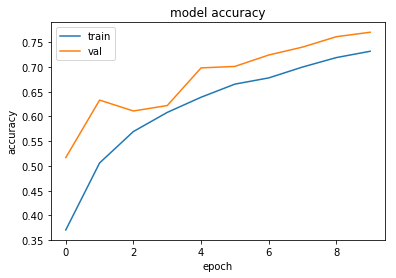

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.title('model accuracy')
plt.show()

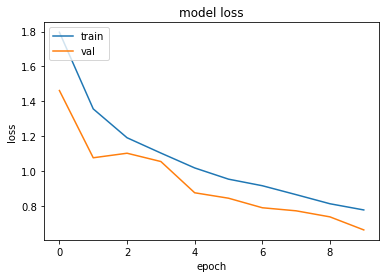

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.title('model loss')
plt.show()

###### Save / Load weights

In [13]:
model.save_weights('CIFAR10_weights.h5')

In [5]:
model.load_weights('CIFAR10_weights.h5')

### Predict on the test set

In [6]:
model.evaluate(X_te, Y_te, batch_size=32)

 9952/10000 [============================>.] - ETA: 0s

[0.66707728910446162, 0.7681]

In [7]:
preds = model.predict(X_te[100:120])
print(np.argmax(Y_te[100:120], axis=1))
print(np.argmax(preds, axis=1))

[4 5 6 3 1 1 3 6 8 7 4 0 6 2 1 3 0 4 2 7]
[4 4 6 3 1 1 3 6 8 7 4 2 2 2 1 3 0 4 6 7]
